In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score

# Data Load

In [51]:
data = pd.read_csv('insurance.csv')

# Label Encoder

In [53]:
label_encoders = {}
categorical_columns = ['sex', 'smoker', 'region']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Exploratory Data Analysis (EDA)

In [56]:
print("\n### First 5 Rows of Data ###")
print(data.head())


### First 5 Rows of Data ###
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [58]:
print("\n### Data Information ###")
print(data.info())


### Data Information ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB
None


In [60]:
print("\n### Statistical Summary ###")
print(data.describe())


### Statistical Summary ###
               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      1.515695  13270.422265  
std       1.104885  12110.011237  
min       0.000000   1121.873900  
25%       1.000000   4740.287150  
50%       2.000000   9382.033000  
75%       2.000000  16639.912515  
max       3.000000  6377

In [62]:
print("\n### Missing Value Analysis ###")
missing_values = data.isnull().sum()
print(missing_values)


### Missing Value Analysis ###
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


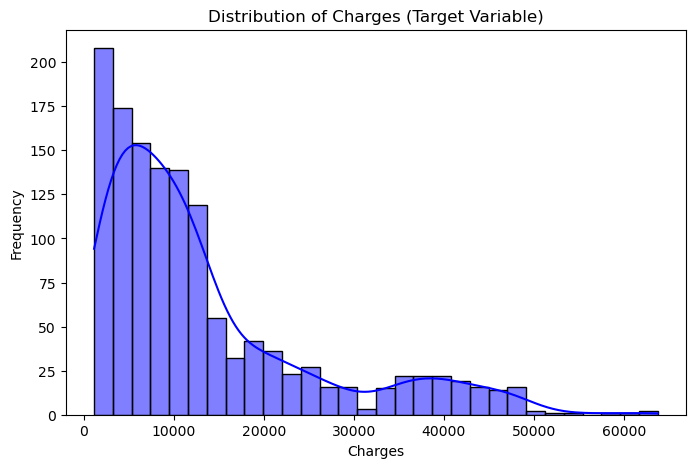

In [64]:
plt.figure(figsize=(8, 5))
sns.histplot(data['charges'], kde=True, color="blue")
plt.title("Distribution of Charges (Target Variable)")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()


### Numerical Columns Analysis ###


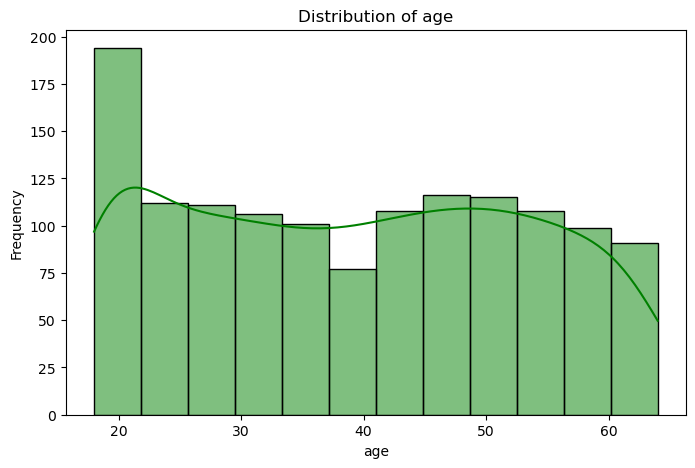

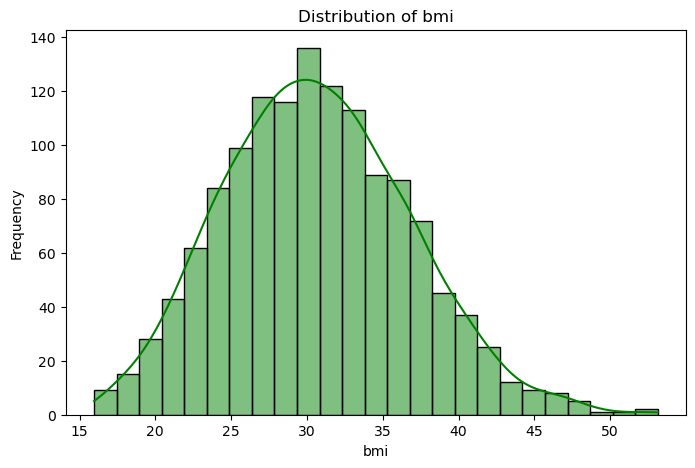

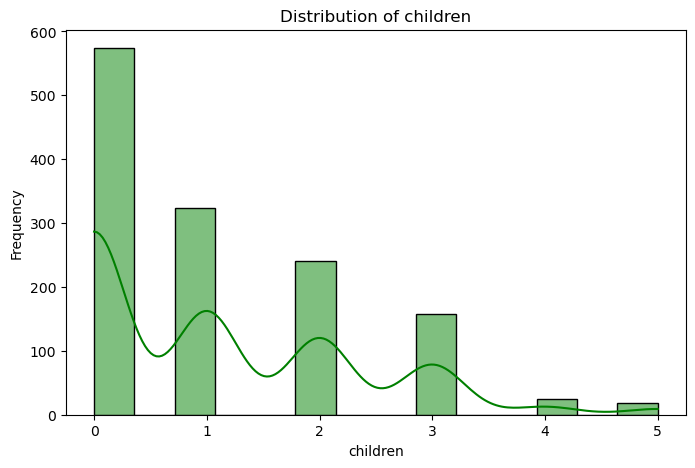

In [66]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("\n### Numerical Columns Analysis ###")
for col in numerical_columns:
    if col != 'charges':  # Hedef değişken ayrı analiz edildi
        plt.figure(figsize=(8, 5))
        sns.histplot(data[col], kde=True, color="green")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

In [93]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("\n### Categorical Columns Analysis ###")
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=data, palette="muted")
    plt.title(f"Count of Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


### Categorical Columns Analysis ###


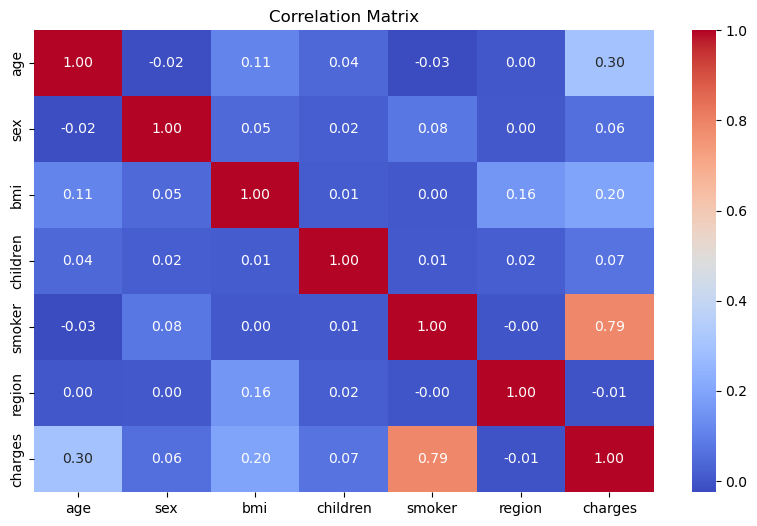

In [70]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### Outlier Analysis ###


C:\Users\Omer\AppData\Local\Temp\ipykernel_24380\429750132.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette="Set3")


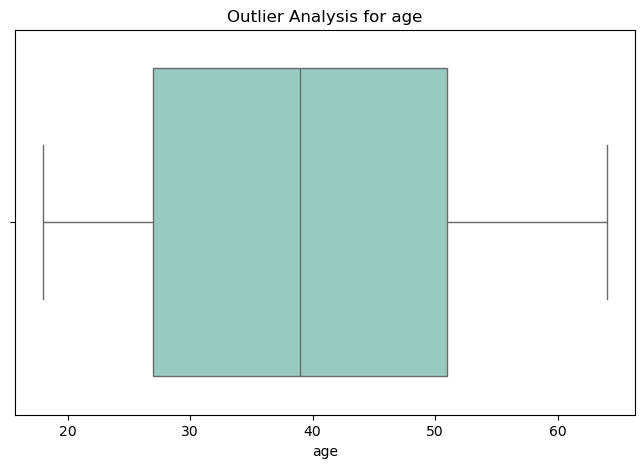

C:\Users\Omer\AppData\Local\Temp\ipykernel_24380\429750132.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette="Set3")


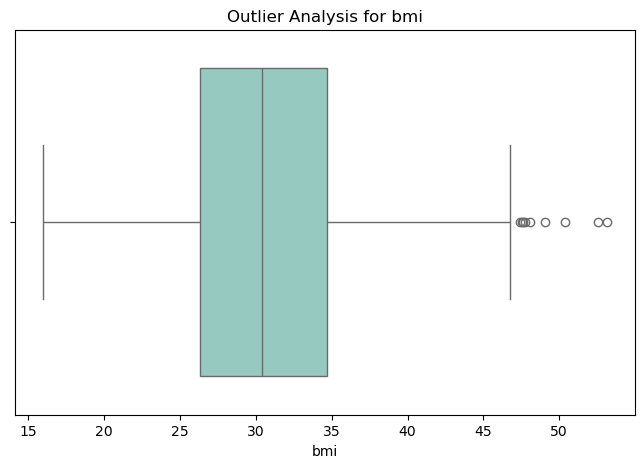

C:\Users\Omer\AppData\Local\Temp\ipykernel_24380\429750132.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette="Set3")


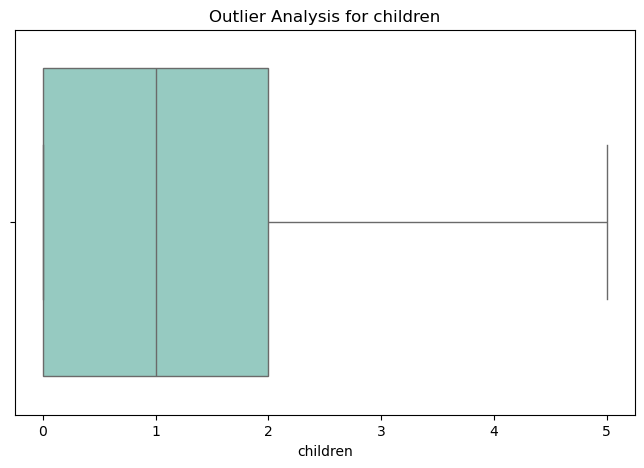

C:\Users\Omer\AppData\Local\Temp\ipykernel_24380\429750132.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette="Set3")


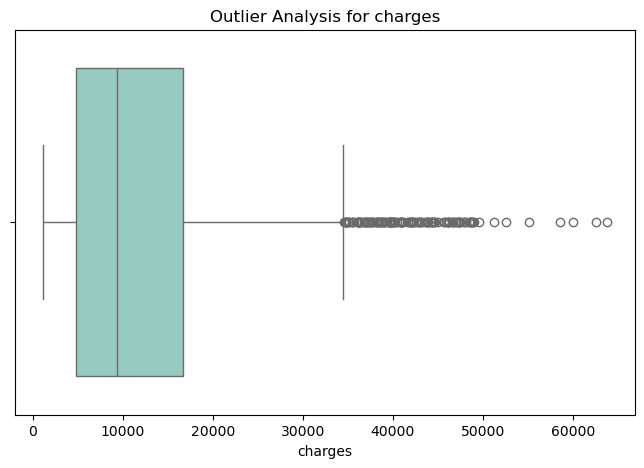

In [72]:
print("\n### Outlier Analysis ###")
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col], palette="Set3")
    plt.title(f"Outlier Analysis for {col}")
    plt.xlabel(col)
    plt.show()

# Data Scaling and Separation

In [75]:
X = data.drop(columns=['charges'])
y = data['charges']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_size3, X_test_size3, y_train_size3, y_test_size3 = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

X_train_size3_rs21, X_test_size3_rs21, y_train_size3_rs21, y_test_size3_rs21 = train_test_split(X_scaled, y, test_size=0.3, random_state=21)

In [77]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [79]:
# Linear Regression Size 0.3
linear_model = LinearRegression()
linear_model.fit(X_train_size3, y_train_size3)
y_pred_linear_size3 = linear_model.predict(X_test_size3)
mse_linear_size3 = mean_squared_error(y_test_size3, y_pred_linear_size3)
r2_linear_size3 = r2_score(y_test_size3, y_pred_linear_size3)

In [81]:
# Linear Regression Random State 21
linear_model = LinearRegression()
linear_model.fit(X_train_size3_rs21, y_train_size3_rs21)
y_pred_linear_size3_rs21 = linear_model.predict(X_test_size3_rs21)
mse_linear_size3_rs21 = mean_squared_error(y_test_size3_rs21, y_pred_linear_size3_rs21)
r2_linear_size3_rs21 = r2_score(y_test_size3_rs21, y_pred_linear_size3_rs21)

# Feature Engineering

In [84]:
data['smoker_charges_ratio'] = data['smoker'] * data['charges']

In [86]:
# Linear Regression (With new feature)
X_with_ratio = data.drop(columns=['charges'])
y = data['charges']
X_scaled_with_ratio = scaler.fit_transform(X_with_ratio)

X_train_ratio, X_test_ratio, y_train_ratio, y_test_ratio = train_test_split(
    X_scaled_with_ratio, y, test_size=0.2, random_state=42
)

linear_model_with_ratio = LinearRegression()
linear_model_with_ratio.fit(X_train_ratio, y_train_ratio)
y_pred_linear_ratio = linear_model_with_ratio.predict(X_test_ratio)

mse_linear_ratio = mean_squared_error(y_test_ratio, y_pred_linear_ratio)
r2_linear_ratio = r2_score(y_test_ratio, y_pred_linear_ratio)

# Random Forest Regression (with New Feature)

In [89]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

X_with_ratio = data.drop(columns=['charges'])
y = data['charges']
X_scaled_with_ratio = scaler.fit_transform(X_with_ratio)

X_train_ratio, X_test_ratio, y_train_ratio, y_test_ratio = train_test_split(
    X_scaled_with_ratio, y, test_size=0.2, random_state=42
)

In [91]:
rf_grid_with_ratio = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, scoring='r2', cv=5)
rf_grid_with_ratio.fit(X_train_ratio, y_train_ratio)

best_rf_with_ratio = rf_grid_with_ratio.best_estimator_
best_rf_params_with_ratio = rf_grid_with_ratio.best_params_
y_pred_rf_with_ratio = best_rf_with_ratio.predict(X_test_ratio)

mse_rf_with_ratio = mean_squared_error(y_test_ratio, y_pred_rf_with_ratio)
r2_rf_with_ratio = r2_score(y_test_ratio, y_pred_rf_with_ratio)

print(f"\n### Best Random Forest with Smoker Charges Ratio Parameters ###")
print(best_rf_params_with_ratio)
print(f"MSE (Best Random Forest with Smoker Charges Ratio): {mse_rf_with_ratio}")
print(f"R² Score (Best Random Forest with Smoker Charges Ratio): {r2_rf_with_ratio}")


### Best Random Forest with Smoker Charges Ratio Parameters ###
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
MSE (Best Random Forest with Smoker Charges Ratio): 14974652.947065279
R² Score (Best Random Forest with Smoker Charges Ratio): 0.9035441204370885


In [95]:
results = {
    "Model": ["Linear Regression", "Linear Regression Size 0.3", "Linear Regression Random State 21",
              "Linear Regression with Smoker Charges Ratio", "Best Random Forest with Smoker Charges Ratio"],
    "MSE": [mse_linear, mse_linear_size3, mse_linear_size3_rs21, mse_linear_ratio, mse_rf_with_ratio],
    "R2": [r2_linear, r2_linear_size3, r2_linear_size3_rs21, r2_linear_ratio, r2_rf_with_ratio]
}

results_df = pd.DataFrame(results)
print("\n### Model Performance Comparison###")
print(results_df)




### Model Performance Comparison###
                                          Model           MSE        R2
0                             Linear Regression  3.363521e+07  0.783346
1                    Linear Regression Size 0.3  3.380547e+07  0.769442
2             Linear Regression Random State 21  3.640549e+07  0.734002
3   Linear Regression with Smoker Charges Ratio  1.690800e+07  0.891091
4  Best Random Forest with Smoker Charges Ratio  1.497465e+07  0.903544


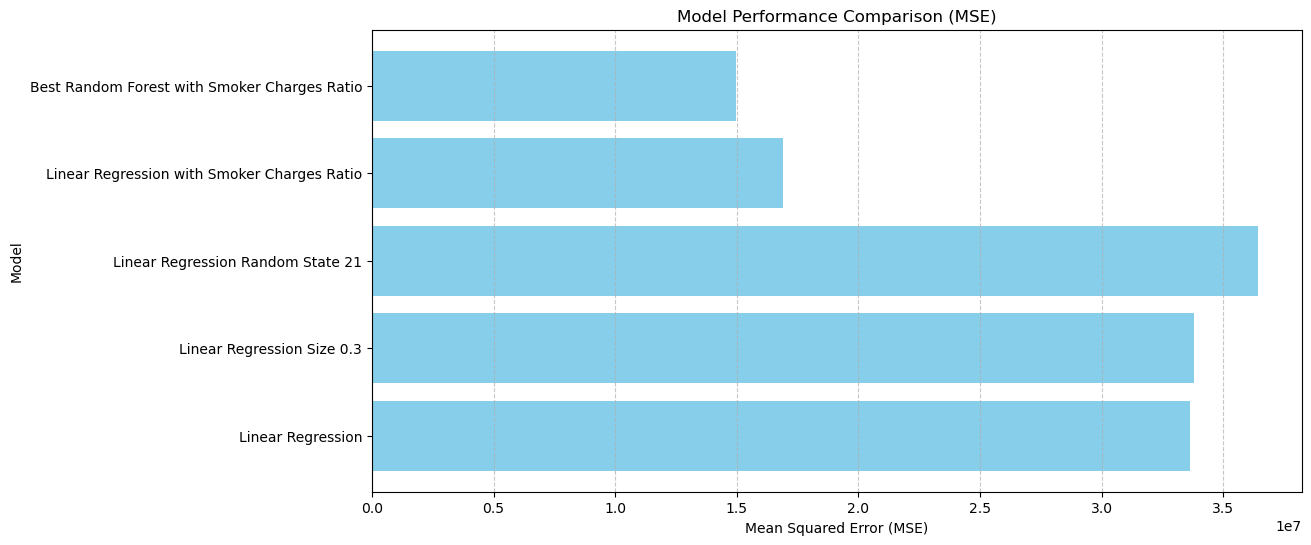

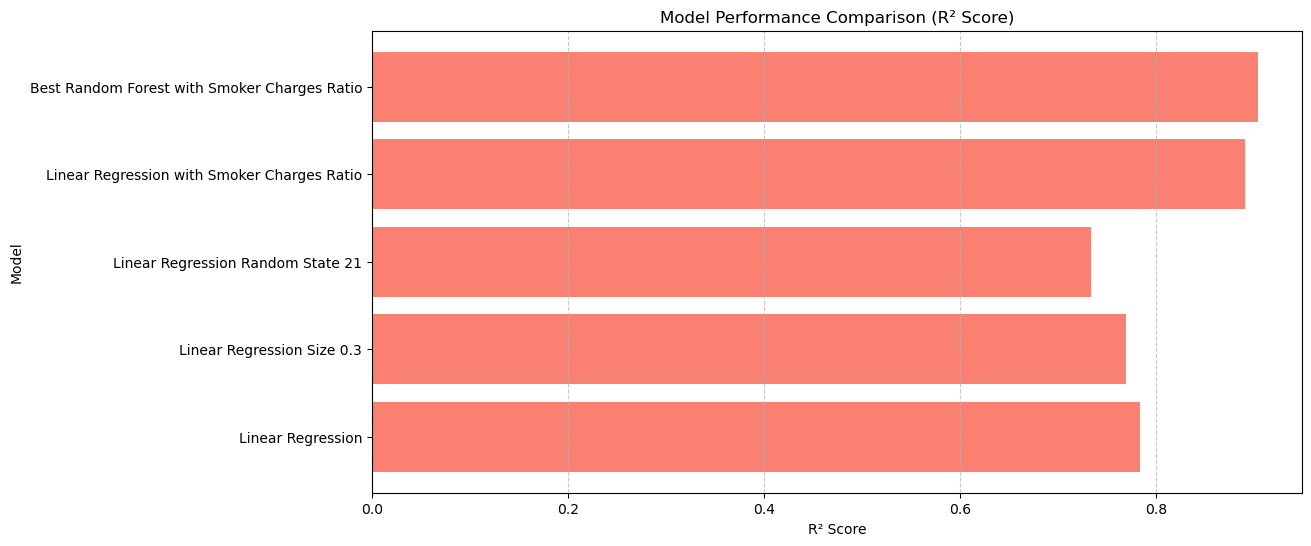

In [97]:
plt.figure(figsize=(12, 6))
plt.barh(results_df["Model"], results_df["MSE"], color="skyblue")
plt.title("Model Performance Comparison (MSE)")
plt.xlabel("Mean Squared Error (MSE)")
plt.ylabel("Model")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(results_df["Model"], results_df["R2"], color="salmon")
plt.title("Model Performance Comparison (R² Score)")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()
